<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/didactica_ciencia_datos/blob/main/referentes/geron/part_2/c_10/c_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# [Chapter 10 – Introduction to Artificial Neural Networks with Keras](https://github.com/ageron/handson-ml3/blob/main/10_neural_nets_with_keras.ipynb)

This notebook contains all the sample code and solutions to the exercises in chapter 10.

## Setup

Primero, importemos algunos módulos comunes, asegurémonos de que MatplotLib trace figuras en línea y prepare una función para guardar las figuras. 

También verificamos que Python 3.5 o posterior esté instalado (aunque Python 2.x puede funcionar, está obsoleto, por lo que le recomendamos que use Python 3 en su lugar), así como Scikit-Learn $\geq 0.20$ y TensorFlow $\geq 2.0$ ps

# Módulo sys de Python

El módulo sys en Python proporciona varias funciones y variables que se utilizan para manipular diferentes partes del entorno de tiempo de ejecución de Python. 

Permite operar sobre el intérprete ya que proporciona acceso a las variables y funciones que interactúan fuertemente con el intérprete. Consideremos el siguiente ejemplo.

In [1]:
# python >= 3.5 es requerido 

import sys

In [2]:
sys.version_info 

sys.version_info(major=3, minor=9, micro=13, releaselevel='final', serial=0)

In [6]:
sys.version_info >= (3,9) 

True

In [9]:
 

assert sys.version_info >= (3,9) 

In [ ]:
sys.version

It also requires Scikit-Learn ≥ 1.0.1:

In [1]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")


And TensorFlow ≥ 2.8:

In [2]:
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")

In [3]:
# tensoflow >= 2.0 es requerido
import tensorflow as tf
assert tf.__version__ >= '2.0'

As we did in previous chapters, let's define the default font sizes to make the figures prettier:

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

And let's create the images/ann folder (if it doesn't already exist), and define the `save_fig()` function which is used through this notebook to save the figures in high-res for the book:

In [4]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ann" # ubicación para las imágenes
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
import numpy as np 
import os 

In [ ]:
# para hacer que la salida de este portátil sea estable a lo largo de las ejecuciones

np.random.seed(42) 

# From Biological to Artificial Neurons

## The Perceptron

### Nota:   

configuramos `max_iter` y `tol` explícitamente para evitar advertencias sobre el hecho de que su valor predeterminado cambiará en futuras versiones de Scikit-Learn.

## Inportación de librerías

In [9]:
import numpy as np
from sklearn.datasets import load_iris # obtención de función importadora de datos load_iris
from sklearn.linear_model import Perceptron

## Obtención de datos

In [25]:
iris = load_iris(as_frame=True) # creamos una variable 
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa

In [26]:
per_clf = Perceptron(random_state=42, max_iter = 1000, tol = 0.001) # instanciamos la clase Perceptron 
per_clf.fit(X, y)

Perceptron(random_state=42)

In [27]:
X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)  # predicts True and False for these 2 flowers

In [28]:
y_pred

array([ True, False])

The Perceptron is equivalent to a `SGDClassifier` with `loss="perceptron"`, `penalty = None` (no regularization, and a constant learning rate (`learning_rate = constant`), y `eta = 1`:

In [29]:
# extra code – shows how to build and train a Perceptron

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="perceptron", penalty=None, learning_rate="constant", eta0=1,\
                        random_state=42)
sgd_clf.fit(X, y)

SGDClassifier(eta0=1, learning_rate='constant', loss='perceptron', penalty=None,
              random_state=42)

In [30]:
assert (sgd_clf.coef_ == per_clf.coef_).all()
assert (sgd_clf.intercept_ == per_clf.intercept_).all()

When the Perceptron finds a decision boundary that properly separates the classes, it stops learning. This means that the decision boundary is often **quite close** to one class:

Cuando el Perceptrón encuentra un límite de decisión que separa adecuadamente las clases, deja de aprender. Esto significa que el límite de decisión suele estar bastante cerca de una clase:

## Visualización de la clasificación de florez de iris. Detector de setosa

In [17]:
from matplotlib import pyplot as plt 
# w0(1) + w1(x1) + w2(x2) = h((1,x1,x2)) = y
# m = -w1/w2
# b = -w0/w2
# cálculo de la pendiente de la recta o umbral de decisión
m = -per_clf.coef_[0][0]/per_clf.coef_[0][1] 
b = -per_clf.intercept_/per_clf.coef_[0][1] # intersecto en el origen de la recta 

In [20]:
axes = [min(X[:,0])-0.3, max(X[:,0])+0.3,min(X[:,1])-0.3, max(X[:,1])+0.3] # definición de la longitud de los ejes. 

In [22]:
# construir cuadrícula
x0,x1 = np.meshgrid(np.linspace(axes[0], axes[1], 500).reshape(-1,1), 
                   np.linspace(axes[1], axes[2], 200).reshape(-1,1)) 

In [23]:
x_new = np.c_[x0.ravel(), x1.ravel()] 

In [32]:
y_predict = per_clf.predict(x_new) 

In [33]:
zz = y_predict.reshape(x0.shape)

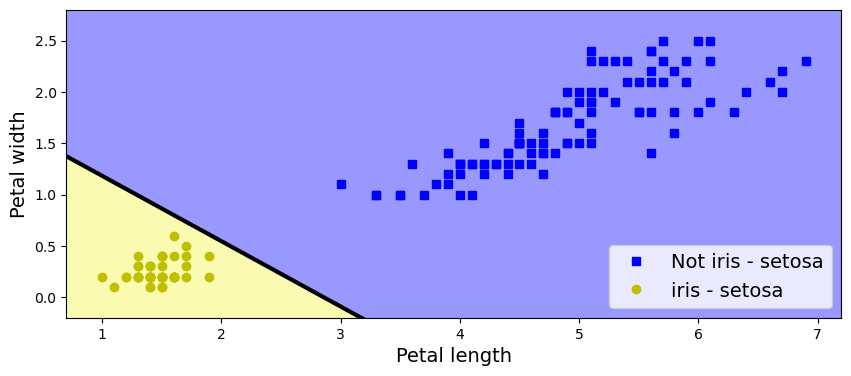

In [42]:
plt.figure(figsize = (10,4))

plt.plot(X[y == 0, 0], X[y==0, 1], 'bs', label = 'Not iris - setosa') # clase negativa
# b para blue, s para square es decir, estilo de trazado en cuadrados 

plt.plot(X[y==1, 0], X[y==1, 1], 'yo', label = 'iris - setosa')
# y para color yellow y `o` para trazado de puntos como círculos. 

plt.plot([axes[0], axes[1]], [a*axes[0]+b, a*axes[1]+b], 'k-', linewidth = 3)

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)


def save_fig(fig_name):
    return plt.savefig(fig_name + '.jpg')

save_fig("perceptron_iris_plot")

plt.show()

## Gráfica del umbral de decision

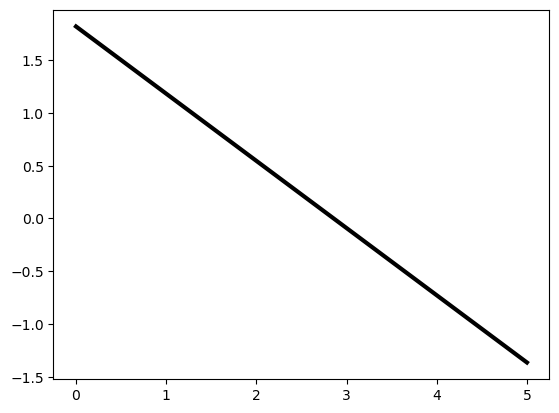

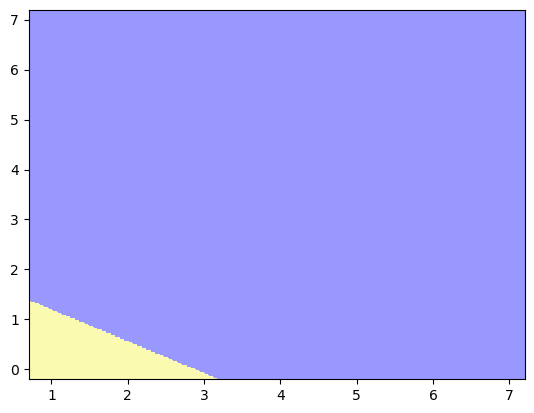

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 5.0, 0.0, 2.0)

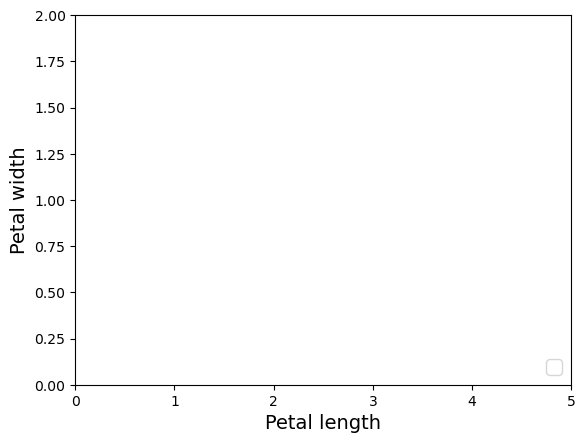

<Figure size 640x480 with 0 Axes>

## Activation functions 

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):             # eps de epsilon 
    return (f(z + eps) - f(z - eps))/(2 * eps)

In [ ]:
z = np.linspace(-5, 5, 200) # crea

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

# Regression MLPs

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

In [ ]:
rmse

# Classification MLPs

In [ ]:
# extra code – this was left as an exercise for the reader

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

# Implementing MLPs with Keras
## Building an Image Classifier Using the Sequential API
### Using Keras to load the dataset

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `tf.keras.datasets`. 

The dataset is already split for you between a training set (60,000 images) and a test set (10,000 images), but it can be useful to split the training set further to have a validation set. 

We'll use 55,000 images for training, and 5,000 for validation.

In [ ]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

The training set contains 60,000 grayscale images, each $28 \times 28$ pixels:

In [ ]:
X_train.shape

Each pixel intensity is represented as a byte (0 to 255):

## Referentes  

* cuaderno del capítulo 10 de Geron: https://github.com/ageron/handson-ml3/blob/main/10_neural_nets_with_keras.ipynb

* Tensorflow Anaconda.org para instalar a tensorflow para el ambiente Conda: https://anaconda.org/conda-forge/tensorflow